In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pathlib
import random
import matplotlib.image as mpimg
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

import tensorflow_hub as hub # untuk mendownload model Deep Learning Imagenet

In [2]:
IMG_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/kaggle/input/butterfly-images40-species/train"
test_dir = "/kaggle/input/butterfly-images40-species/test"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = IMG_SHAPE,
                                               batch_size = BATCH_SIZE,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = IMG_SHAPE,
                                               batch_size = BATCH_SIZE,
                                               class_mode = "categorical")

Found 12639 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [3]:
# Compare the following 2 models

resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [4]:
def create_model(model_url, num_classes):
    #Download model yang sudah dilatih dari TF dan save sebagai layer untuk model kita
    feature_extractor_layer = hub.KerasLayer(model_url,
                                             trainable = False, #Freeze the layer
                                             name="feature_extraction_layer",
                                             input_shape = IMG_SHAPE+(3,)) # (224, 224, 3)
    
    #Create our model
    model = tf.keras.Sequential([
        feature_extractor_layer,
        Dense(num_classes,
                   activation = "softmax",
                   name="output_layer")
    ])
    
    return model

In [5]:
# Create ResNet Model
resnet_model = create_model(resnet_url, num_classes = train_data.num_classes)

In [6]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 100)               204900    
                                                                 
Total params: 23,769,700
Trainable params: 204,900
Non-trainable params: 23,564,800
_________________________________________________________________


In [7]:
resnet_model.compile(loss = "categorical_crossentropy",
                     optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["accuracy"])

In [8]:
resnet_history = resnet_model.fit(train_data, #Belajar data butterfly
                                  epochs = 3,
                                 steps_per_epoch = len(train_data),
                                 validation_data = test_data,
                                 validation_steps = len(test_data))

Epoch 1/3
395/395 [==============================] - 1023s 3s/step - loss: 1.2284 - accuracy: 0.7276 - val_loss: 0.4240 - val_accuracy: 0.9020
Epoch 2/3
395/395 [==============================] - 1012s 3s/step - loss: 0.3488 - accuracy: 0.9190 - val_loss: 0.2863 - val_accuracy: 0.9280
Epoch 3/3
395/395 [==============================] - 1014s 3s/step - loss: 0.2058 - accuracy: 0.9553 - val_loss: 0.2555 - val_accuracy: 0.9340


In [9]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]    
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]    
    
    epochs = range(len(history.history["loss"]))
    
    plt.plot(epochs, loss, label="Training Loss")
    plt.plot(epochs, val_loss, label="Val Loss")
    plt.title("loss")
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, accuracy, label="Training Accuracy")
    plt.plot(epochs, val_accuracy, label="Val Accuracy")
    plt.title("accuracy")
    plt.legend()

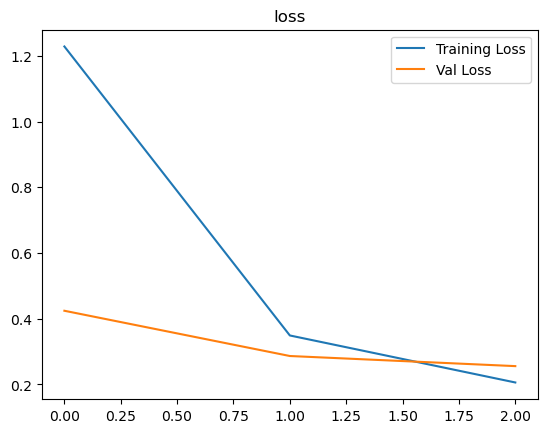

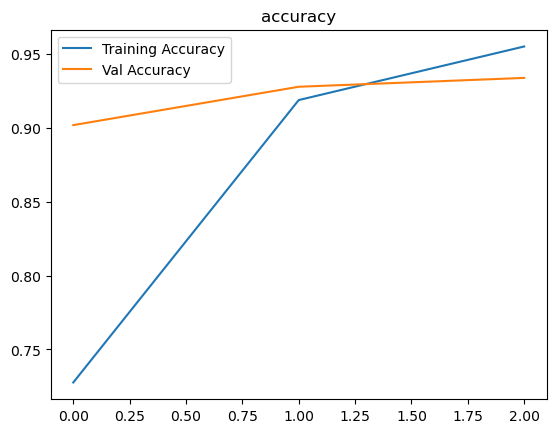

In [10]:
plot_loss_curves(resnet_history)

In [11]:
resnet_model.evaluate(test_data)

16/16 [==============================] - 39s 2s/step - loss: 0.2555 - accuracy: 0.9340


[0.25553905963897705, 0.9340000152587891]

In [12]:
####

# Programmer A ==> 20 Tahun  --> Model Imagenet
## Menggunakan pengalaman 20 tahun coding + Belajar bahasa Marvel ==> Bangun Roket

# Programmer B ==> 1 Bulan   --> Model Butterfly semalam
## Pengalaman 1 Bulan + belajar bahasa marvel

# Project untuk bangun Roket  ==> Bahasa Marvel